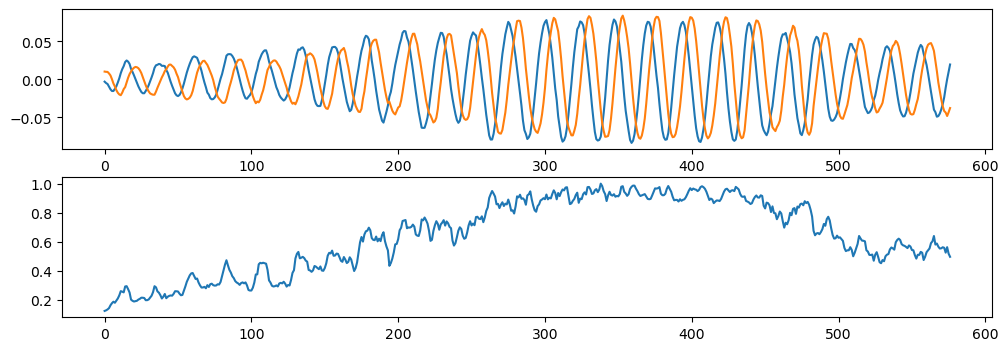

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

res = np.load("AT1G58602.1.npy")
v1 = res[:, 0]
v2 = res[:, 1]

plt.figure(figsize=(12, 4))
plt.subplot(211)
plt.plot(v1)
plt.plot(v2)
plt.subplot(212)
r = np.sqrt(v1**2+v2**2)
r = r/np.max(r)
r_orig = r
plt.plot(r)

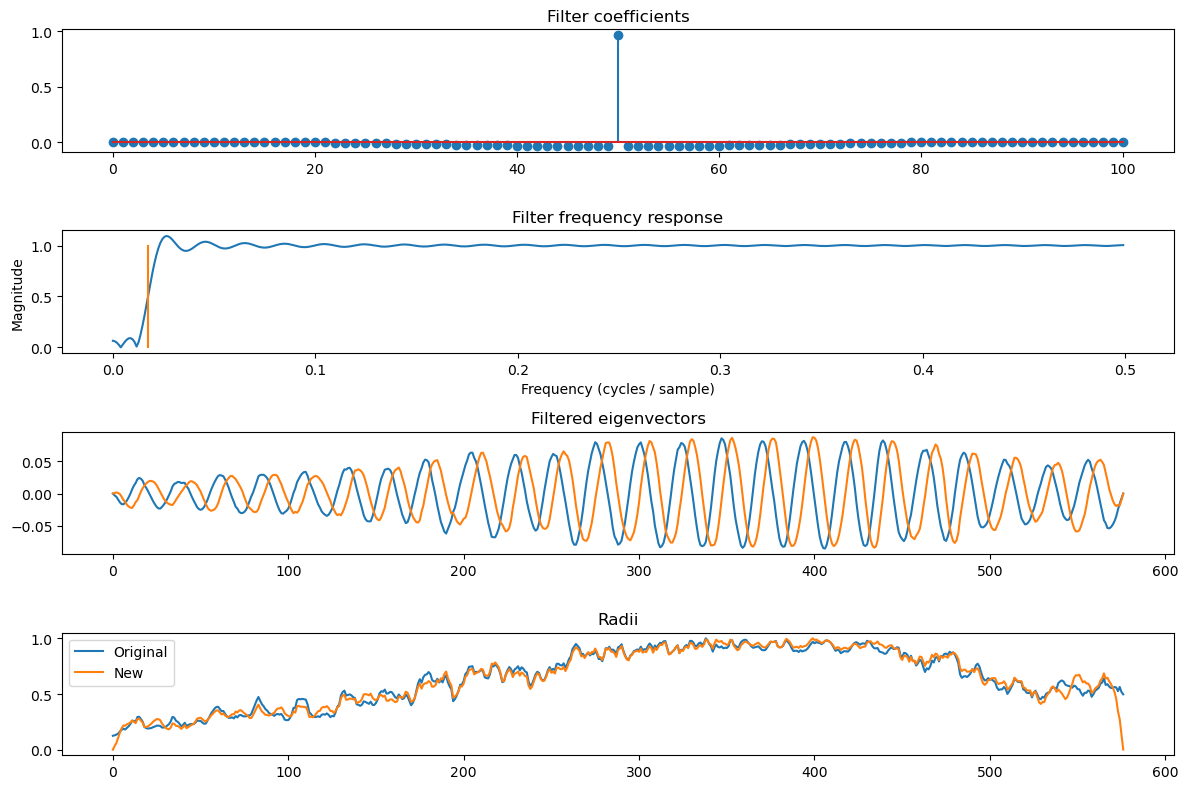

In [2]:
cutoff = 10/v1.size # 10 cycles per interval, which should be way slower than our frequency of interest
bands = (0, cutoff, cutoff, 0.5)
desired = (0, 0, 1, 1)
b = signal.firls(101, bands, desired, nyq=0.5)
a = [1]

w, h = signal.freqz(b)

v1filt = signal.filtfilt(b, a, v1)
v2filt = signal.filtfilt(b, a, v2)

r = np.sqrt(v1filt**2+v2filt**2)
r = r/np.max(r)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.stem(b)
plt.title("Filter coefficients")
plt.subplot(412)
plt.plot(w*0.5/np.pi, np.abs(h))
plt.plot([cutoff, cutoff], [0, 1])
plt.title("Filter frequency response")
plt.xlabel("Frequency (cycles / sample)")
plt.ylabel("Magnitude")
plt.subplot(413)
plt.plot(v1filt)
plt.plot(v2filt)
plt.title("Filtered eigenvectors")
plt.subplot(414)
plt.plot(r_orig)
plt.plot(r)
plt.legend(["Original", "New"])
plt.title("Radii")
plt.tight_layout()